## Summary:

In this notebook, 5 ML Classifiers are used for the given dataset.The various accuracy along different classifiers. The Classifiers used are Logistic regression,Random Forest,MLP Classifier,Dummy Classifier & SVM. Among all of these , Logistic Regression is having higher efficiency in terms of accuracy.

* Data visualisation
* Implying 5 models 
* Model evaluation (Feature selection by random forest)
* Find best parameters(next task)

## Data visualisation


In [2]:
from sklearn.preprocessing import RobustScaler #robust normlization for outliers
import sklearn.metrics as metrics #metrics librry
import seaborn as sns # for intractve graphs
from sklearn.ensemble import RandomForestClassifier #Random Forest
import matplotlib.pyplot as plt #for visualization
from sklearn.metrics import classification_report

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import IsolationForest #Isolation 

import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

#loading the dataset 
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv")
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 9380 non-null   int64  
 1   loc                9380 non-null   float64
 2   v(g)               9380 non-null   float64
 3   ev(g)              9380 non-null   float64
 4   iv(g)              9380 non-null   float64
 5   n                  9380 non-null   float64
 6   v                  9380 non-null   float64
 7   l                  9380 non-null   float64
 8   d                  9380 non-null   float64
 9   i                  9380 non-null   float64
 10  e                  9380 non-null   float64
 11  b                  9380 non-null   float64
 12  t                  9380 non-null   float64
 13  lOCode             9380 non-null   float64
 14  lOComment          9380 non-null   float64
 15  lOBlank            9380 non-null   float64
 16  locCodeAndComment  9380 

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,Category
0,8255,25.0,4.0,1.0,4.0,82.0,385.44,0.07,15.00,25.70,...,17.0,0.0,3.0,0.0,13.0,13.0,52.0,30.0,7.0,0
1,7507,40.0,12.0,12.0,12.0,146.0,806.44,0.06,17.29,46.63,...,36.0,0.0,2.0,0.0,17.0,29.0,87.0,59.0,23.0,0
2,6758,52.0,2.0,1.0,2.0,227.0,981.08,0.01,86.33,11.36,...,36.0,3.0,10.0,0.0,14.0,6.0,153.0,74.0,3.0,0
3,19,85.0,9.0,1.0,7.0,277.0,1714.58,0.03,32.64,52.53,...,69.0,0.0,14.0,0.0,26.0,47.0,161.0,118.0,13.0,1
4,1299,38.0,4.0,1.0,1.0,210.0,1117.60,0.04,24.23,46.12,...,29.0,0.0,7.0,0.0,14.0,26.0,120.0,90.0,7.0,1


In [4]:
#convert data into numpy arrays
id_person=df_train.iloc[:,0].values # column of customer id
X = df_train.iloc[:,1:-1].values # column of the inputs
y = df_train.iloc[:,-1].values # column of the output
X

array([[ 25.,   4.,   1., ...,  52.,  30.,   7.],
       [ 40.,  12.,  12., ...,  87.,  59.,  23.],
       [ 52.,   2.,   1., ..., 153.,  74.,   3.],
       ...,
       [ 20.,   2.,   1., ...,  61.,  24.,   3.],
       [ 33.,   4.,   3., ...,  54.,  36.,   7.],
       [292.,  37.,  11., ..., 384., 249.,  71.]])

## Model comparasion


In this part, 12 models are compared with same dataset,
To maxinum the accuracy, 10-fold method is used on test dataset.

C:\Users\curly\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\curly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\curly\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\curly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

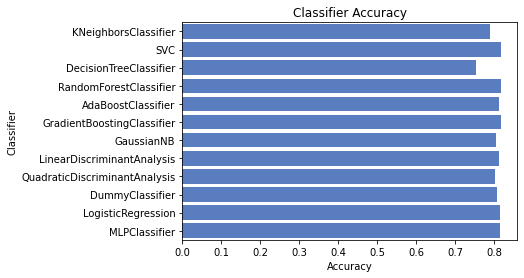

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),DummyClassifier(strategy="most_frequent"),
    LogisticRegression(),MLPClassifier(hidden_layer_sizes=(3,),max_iter=500000,activation="logistic",solver="lbfgs", random_state=42)]

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
k_fold = KFold(n_splits=10,  shuffle=True, random_state=42)
acc_dict = {}
#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
  #  y_train, y_test = y[train_index], y[test_index]
for train_indices, test_indices in k_fold.split(X):
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    scalerX = StandardScaler()
    scalerX.fit(X_train)
    X_train_n = scalerX.transform(X_train)
    X_test_n  = scalerX.transform(X_test )
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train_n, y_train)
        train_predictions = clf.predict(X_test_n)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

## Model implementation

### 1. Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

In [17]:
from sklearn.linear_model import LogisticRegression

n_bins = 4
# 10 - fold
k_fold = KFold(n_splits=10)
Accuracy=[]
Id=df_test.iloc[:,0].values
X=df_train.iloc[:,0:-1].values
y=df_train.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
# start train and compute accuracy
for train_indices, test_indices in k_fold.split(X):
    #print('Train: %s | test: %s' % (train_indices, test_indices))
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    clf = LogisticRegression(solver='lbfgs', multi_class='multinomial') 
    #training
    clf.fit(X_train, y_train)
    #prediction
    y_test_pred  = clf.predict(X_test)
    #accuracy
    Accuracy.append(accuracy_score(y_test,y_test_pred))
    
print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy)))
# 0.9486140724946696 before drop row
# 0.9480810234541577 after drop row

C:\Users\curly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\curly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\curly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\curly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\curly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Average 10-fold cross-validation accuracy= 0.9480810234541577


C:\Users\curly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
# do prediction by training result
Y = clf.predict(df_test)
# print into csv, wait to upload
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', Id.astype(int))
Prediction.insert(1, 'Category', Y.astype(int))
Prediction.to_csv("Prediction_logistic_1.csv", index=False)


### 2. Random forest

**Random forest** is a classifier containing multiple decision trees, and the output category is determined by the mode of the categories output by the individual trees. Its biggest feature is that it can analyze the importance of each property for prediction, so it is also widely used for **feature analysis**.

In [5]:
#10-fold
k_fold_rf = KFold(n_splits=10)
Id =df_train.iloc[:,0].values
X_rf=df_train.iloc[:,1:-1].values
y_rf=df_train.iloc[:,-1].values
Accuracy_rf=[]

# build up the model
rfc = RandomForestClassifier(n_estimators = 1600,
 min_samples_split = 2,
 min_samples_leaf = 5,
 max_features = 'sqrt',
 max_depth = 100,
 bootstrap = True)
;
# do training and compute accuracy
for train_indices, test_indices in k_fold_rf.split(X_rf):
    X_train, X_test, y_train, y_test =X_rf[train_indices], X_rf[test_indices], y_rf[train_indices],y_rf[test_indices]
    rfc.fit(X_train,y_train)
    y_test_pred = rfc.predict(X_test)
    tresholds = np.linspace(0 , 1 , 200)
    Accuracy_rf.append(accuracy_score(y_test,y_test_pred.astype(int)))

print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy_rf)))
# Average 10-fold cross-validation accuracy= 0.8201492537313433 -1600

Average 10-fold cross-validation accuracy= 0.8200426439232409


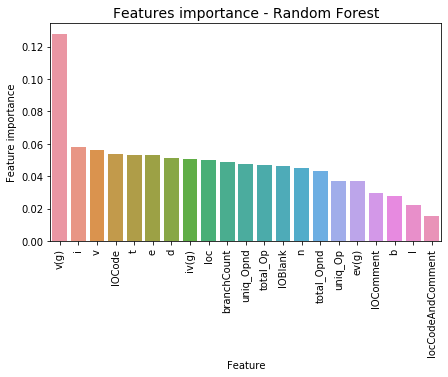

In [33]:
#After training, we can get the Feature importance by a method provided by random forest

predictors = ['v(g)', 'loc', 'ev(g)', 'iv(g)', 'n', 'v','l', 'd', 'i', 'e', 'b', 't',\
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance - Random Forest',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### 3. Multi-Layer Perception Classifier

Multi-layer Perceptron classifier.
This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
The ith element represents the number of neurons in the ith hidden layer.
activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
Activation function for the hidden layer.
‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
The solver for weight optimization.
‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
‘sgd’ refers to stochastic gradient descent.
‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba


In [5]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
for hiddernodes in range(20,21):
    print(hiddernodes)
    k_fold = KFold(n_splits=10,  shuffle=True, random_state=42)
    Accuracy=[]
    for train_indices, test_indices in k_fold.split(X):
        #print('Train: %s | test: %s' % (train_indices, test_indices))
        X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
        #(A) data pre-processing 
        scalerX = StandardScaler()
        scalerX.fit(X_train)
        X_train_n = scalerX.transform(X_train)
        X_test_n  = scalerX.transform(X_test )
    
        #(B)  ML algorithm fitting
        #clf = LogisticRegression(random_state=0, solver='lbfgs', C=1, max_iter=3000)
        mlp = MLPClassifier(hidden_layer_sizes=(hiddernodes,), alpha=1, max_iter=300000,activation="relu",solver="lbfgs")
        mlp.fit(X_train_n, y_train)    
        # (C) Prediction
        y_test_pred =  mlp.predict(X_test_n)    
        # (D) Score 
        Accuracy.append(accuracy_score(y_test,y_test_pred))
    
    print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy)))

20
Average 10-fold cross-validation accuracy= 0.8137526652452026


In [ ]:
#we use all train data:
X_train = X
y_train = y

#We convert test data into numpy arrays
id_person = df_test.iloc[:,0].values # column of customer id
X_test_final = df_test.iloc[:,1:].values # column of the inputs
X_test_final


In [ ]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_n = scalerX.transform(X_train)
X_test_n  = scalerX.transform(X_test_final )

#(B)  ML algorithm fitting
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train_n, y_train)

# (C) Prediction
y_test_pred = clf.predict(X_test_n)

In [ ]:
#we format the prediction in the right-format for Kaggle and save it into a csv file
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', y_test_pred.astype(int))
Prediction.to_csv("result.csv", index=False)
Prediction

Now we know V(g) is the most importance feature of this model.  
For further improve, this result could be used in feature selection.  
For example, we can just use top 10 important feature to cut off the comput comsuming.  

### 4.  DummyClassifier

The dummy classifier gives you a measure of “baseline” performance — i.e. the success rate one should expect to achieve even if simply guessing.

In [7]:
X_train = df_train.iloc[:,1:-1].values#we discard the first column Id
y_train = df_train.iloc[:,-1].values#we want to predict Category

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy="most_frequent")#it implements the majority class classifier
clf.fit(X_train,y_train)

#input for the test set
X_test = df_test.iloc[:,1:].values

#prediction of the majority class classifier
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,clf.predict(X_train))



0.8075692963752665

### 5. SVM

Support Vector Machines (SVMs) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.


In [9]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

k_fold = KFold(n_splits=10,  shuffle=True, random_state=42)
Accuracy=[]
'''
IMPORTANT PARAMETERS

C:
Penalty parameter C of the error term.
Default Value is 1

gamma:
The leaf is the end node of the decision tree. 
Smaller leaves make it easier for the model to capture noise in the training data.

degree:
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
'''
for train_indices, test_indices in k_fold.split(X):
    #print('Train: %s | test: %s' % (train_indices, test_indices))
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    #(A) data pre-processing 
    scalerX = StandardScaler()
    scalerX.fit(X_train)
    X_train_n = scalerX.transform(X_train)
    X_test_n  = scalerX.transform(X_test )
    
    #(B)  ML algorithm fitting
    clf = SVC(kernel='poly',degree=2)
    clf.fit(X_train_n, y_train)    
    # (C) Prediction
    y_test_pred = clf.predict(X_test_n)    
    # (D) Score 
    Accuracy.append(accuracy_score(y_test,y_test_pred))
    
print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy)))

Average 10-fold cross-validation accuracy= 0.8137526652452026


In [ ]:
X_train = X
y_train = y

#We convert test data into numpy arrays
id_person = df_test.iloc[:,0].values # column of customer id
X_test_final = df_test.iloc[:,1:].values # column of the inputs
X_test_final

In [ ]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_n = scalerX.transform(X_train)
X_test_n  = scalerX.transform(X_test_final )

#(B)  ML algorithm fitting
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train_n, y_train)

# (C) Prediction
y_test_pred = clf.predict(X_test_n)

## Conclusion and Comparison:

|Accuracy/Model       |Logistic Regression|  SVM   | DC | MLP  | Random Forest|
|---------------|----------------|--------|--------|-------|---------------|
|Accuracy before|  0.803      |   0.814   |  0.8075692963752665   |  0.817781112637364  |  0.8166311300639659 |
|Accuracy after |  0.94      |   0.816   |   0.8075692963752665  |   0.837782863449213   |   0.8201415600999153      |

In this critical review, to evaluate the performance of five representative classifiers and found all of them suffer from the problem of overfitting.We analyzed the underlying issues and suggest that the main causes of the overfitting problem include that the numbers of training cases were too small. We made recommendations on how to avoid overfitting in this problem and to improve the reliability and robustness of ML-based algorithms in general. We considered Logistic Regression approach as it is based on the fact that it maximizes the posterior class probability. 

## PCA trial